In [1]:
import numpy as np
from sympy import *
import matplotlib.pyplot as plt
import pandas as pd

import sys
from pathlib import Path

repo_parent = Path.cwd().resolve().parents[0]
if str(repo_parent) not in sys.path:
    sys.path.insert(0, str(repo_parent))

# 3) Autoreload to pick up edits to Maurice2/*
%load_ext autoreload
%autoreload 2

from main.dynamics2 import Dynamics2

In [2]:
xhat0 = np.array([0, 0, 0, 0, 0, 0, 1, 0, 0, 0]) # Initial state estimate
sampling_rate = 20.0  # Hz
dt = 1.0 / sampling_rate

dynamics = Dynamics2(dt=dt, x0=xhat0)
dynamics.setup_eom()
dynamics.run_rk4(xhat=xhat0)

(array([ 0.  ,  0.05,  0.1 ,  0.15,  0.2 ,  0.25,  0.3 ,  0.35,  0.4 ,
         0.45,  0.5 ,  0.55,  0.6 ,  0.65,  0.7 ,  0.75,  0.8 ,  0.85,
         0.9 ,  0.95,  1.  ,  1.05,  1.1 ,  1.15,  1.2 ,  1.25,  1.3 ,
         1.35,  1.4 ,  1.45,  1.5 ,  1.55,  1.6 ,  1.65,  1.7 ,  1.75,
         1.8 ,  1.85,  1.9 ,  1.95,  2.  ,  2.05,  2.1 ,  2.15,  2.2 ,
         2.25,  2.3 ,  2.35,  2.4 ,  2.45,  2.5 ,  2.55,  2.6 ,  2.65,
         2.7 ,  2.75,  2.8 ,  2.85,  2.9 ,  2.95,  3.  ,  3.05,  3.1 ,
         3.15,  3.2 ,  3.25,  3.3 ,  3.35,  3.4 ,  3.45,  3.5 ,  3.55,
         3.6 ,  3.65,  3.7 ,  3.75,  3.8 ,  3.85,  3.9 ,  3.95,  4.  ,
         4.05,  4.1 ,  4.15,  4.2 ,  4.25,  4.3 ,  4.35,  4.4 ,  4.45,
         4.5 ,  4.55,  4.6 ,  4.65,  4.7 ,  4.75,  4.8 ,  4.85,  4.9 ,
         4.95,  5.  ,  5.05,  5.1 ,  5.15,  5.2 ,  5.25,  5.3 ,  5.35,
         5.4 ,  5.45,  5.5 ,  5.55,  5.6 ,  5.65,  5.7 ,  5.75,  5.8 ,
         5.85,  5.9 ,  5.95,  6.  ,  6.05,  6.1 ,  6.15,  6.2 ,  6.25,
      

AttributeError: 'Dynamics2' object has no attribute 'quat_to_euler_xyz'

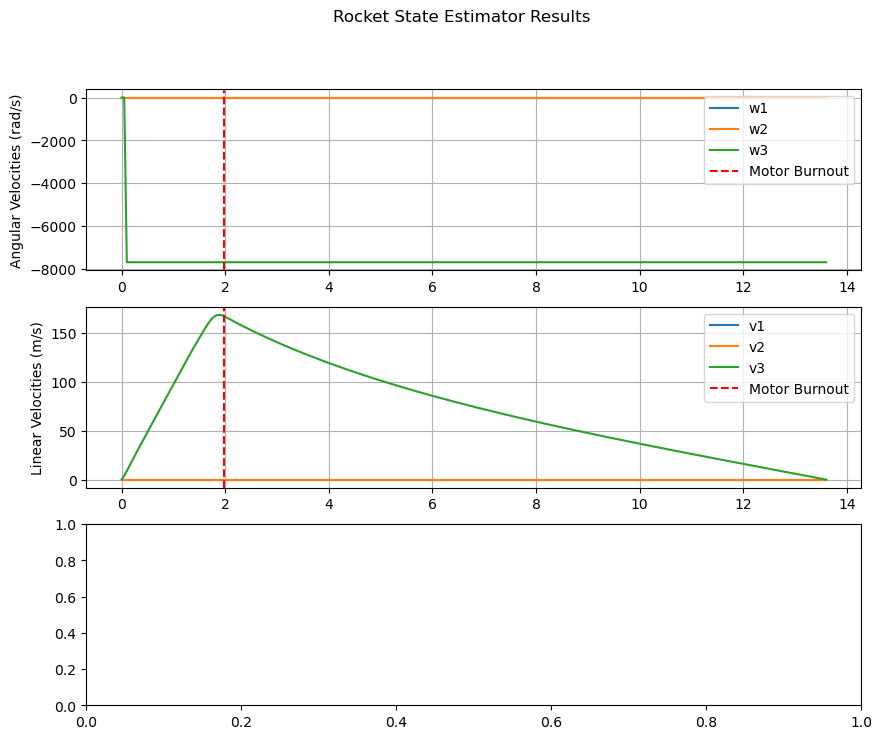

In [3]:
xhat = np.array(dynamics.states)
t = np.arange(0, xhat.shape[0]*dynamics.dt, dynamics.dt)

fig, axs = plt.subplots(3, 1, figsize=(10, 8), sharex=False)
fig.suptitle('Rocket State Estimator Results')
axs[0].plot(t, xhat[:, 0], label='w1')
axs[0].plot(t, xhat[:, 1], label='w2')
axs[0].plot(t, xhat[:, 2], label='w3')
axs[0].axvline(dynamics.t_motor_burnout, color='r', linestyle='--', label='Motor Burnout')
axs[0].set_ylabel('Angular Velocities (rad/s)')
axs[0].legend(loc='upper right')
axs[0].grid()
axs[1].plot(t, xhat[:, 3], label='v1')
axs[1].plot(t, xhat[:, 4], label='v2')
axs[1].plot(t, xhat[:, 5], label='v3')
axs[1].axvline(dynamics.t_motor_burnout, color='r', linestyle='--', label='Motor Burnout')
axs[1].set_ylabel('Linear Velocities (m/s)')
axs[1].legend(loc='upper right')
axs[1].grid()

# Convert quaternion to Euler angles for plotting
euler_angles = np.array([dynamics.quat_to_euler_xyz(q) for q in xhat[:, 6:10]])
axs[2].plot(t, np.rad2deg(euler_angles[:, 0]), label='Pitch (θ)')
axs[2].plot(t, np.rad2deg(euler_angles[:, 1]), label='Yaw (φ)')
axs[2].plot(t, np.rad2deg(euler_angles[:, 2]), label='Roll (ψ)')
axs[2].axvline(dynamics.t_motor_burnout, color='r', linestyle='--', label='Motor Burnout')
axs[2].set_ylabel('Euler Angles (°)')
axs[2].set_xlabel('Time (s)')
axs[2].legend(loc='upper right')
axs[2].grid()
plt.tight_layout()

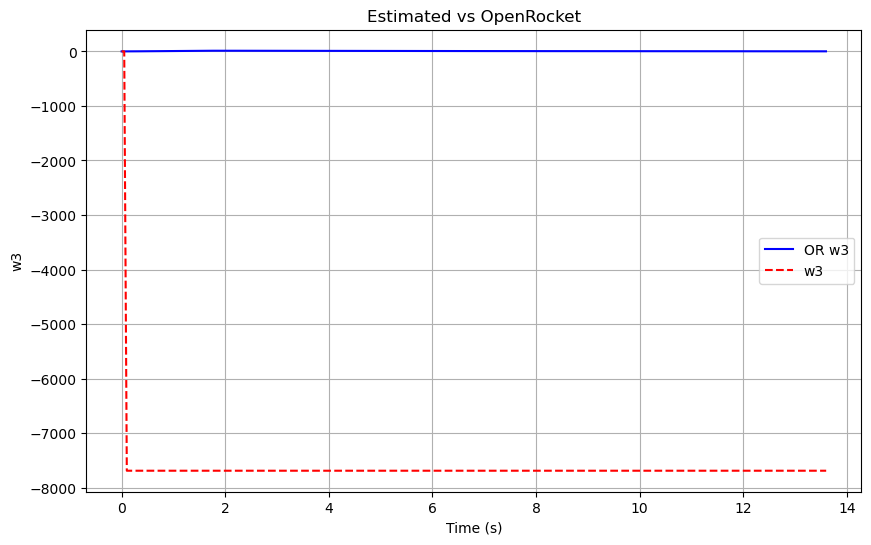

In [5]:
# Compare with OpenRocket data
import pandas as pd
openrocket_data = pd.read_csv("../data/openrocket_data2.csv")
time = openrocket_data['# Time (s)']
mask = time <= t[-1]
v3_or = openrocket_data['Vertical velocity (m/s)'][mask]
w3_or = openrocket_data['Roll rate (°/s)'][mask]
v3_dyn = xhat[:, 5]
w3_dyn = xhat[:, 2]
plt.figure(figsize=(10, 6))
plt.plot(time[mask], np.deg2rad(w3_or), label='OR w3', color='blue')
plt.plot(t, w3_dyn, label='w3', color='red', linestyle='--')
# plt.plot(time[mask], v3_or, label='OR v3', color='blue')
# plt.plot(t, v3_dyn, label='v3', color='red', linestyle='--')
plt.xlabel('Time (s)')
plt.ylabel('w3')
plt.title('Estimated vs OpenRocket')
plt.legend()
plt.grid()
plt.show()

In [6]:
dynamics.f_params

AttributeError: 'Dynamics2' object has no attribute 'f_params'